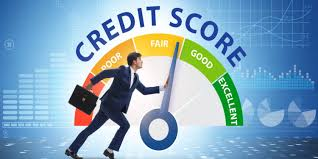

# Dataset

**Problem Statement**

- You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

**Task**
- Given a person’s credit-related information, build a machine learning and deep learning model that can classify the credit score.

**ID:** A unique identifier for the individual.

**Customer_ID:** Customer identification number.

**Month:** The month in which the data was obtained.

**Name:** Name of the customer.

**Age:** Age of the customer.

**Occupation:** Occupation of the customer.

**Annual_Income:** Annual income of the individual.

**Annual_Income:** The Annual Income of the person

**Monthly_Inhand_Salary:** Monthly in-hand salary of the person

**Num_Bank_Accounts:** The number of bank accounts of the person

**Num_Credit_Card:** Number of credit cards the person is having

**Interest_Rate:** The interest rate on the credit card of the person

**Num_of_Loan:** The number of loans taken by the person from the bank

**Type_of_Loan:** The types of loans taken by the person from the bank

**Delay_from_due_date:** The average number of days delayed by the person from the date of payment

**Num_of_Delayed_Payment:** Number of payments delayed by the person

**Changed_Credit_Card:** The percentage change in the credit card limit of the person

**Num_Credit_Inquiries:** The number of credit card inquiries by the person

**Credit_Mix:** Classification of Credit Mix of the customer

**Outstanding_Debt:** The outstanding balance of the person

**Credit_Utilization_Ratio:** The credit utilization ratio of the credit card of the customer

**Credit_History_Age:** The age of the credit history of the person

**Payment_of_Min_Amount:** Yes if the person paid the minimum amount to be paid only, otherwise no.

**Total_EMI_per_month:** The total EMI per month of the person

**Amount_invested_monthly:** The monthly amount invested by the person

**Payment_Behaviour:** The payment behaviour of the person

**Monthly_Balance:** The monthly balance left in the account of the person

**Credit_Score:** The credit score of the person


# Packages Importing and Loading Files

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix
from imblearn.over_sampling import SMOTE

In [58]:
# Specify the file path 
file_path = "Credit_Score_Cleaned_EDA.csv"

# Read the CSV file
df1 = pd.read_csv(file_path)
df1.head() 

,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Total_EMI_per_month,Credit_History_Age_Months,Credit_Score_Encoded,Credit_Mix_Encoded,Total_Num_Accounts,Debt_Per_Account,Debt_to_Income_Ratio,Delayed_Payments_Per_Account
0,19114.120,3,4,3,4,5,4.000,4.000,809.980,49.575,268,2.000,2.000,7,115.711,0.042,0.571
1,19114.120,3,4,3,4,3,8.000,4.000,809.980,49.575,271,2.000,2.000,7,115.711,0.042,1.143
2,34847.840,2,4,6,1,7,1.000,2.000,605.030,18.816,320,2.000,2.000,6,100.838,0.017,0.167
3,34847.840,2,4,6,1,3,3.000,2.000,605.030,18.816,322,2.000,2.000,6,100.838,0.017,0.500
4,34847.840,2,4,6,1,3,1.000,2.000,605.030,18.816,323,2.000,2.000,6,100.838,0.017,0.167


In [59]:
df = df1.copy()

# Model Building

## Train-Test Split

In [4]:
X = df.drop(["Credit_Score_Encoded"],axis=1)
y = df["Credit_Score_Encoded"]

In [5]:
y.value_counts(normalize=True) #unbalanced

Credit_Score_Encoded
1.000   0.533
0.000   0.292
2.000   0.175
Name: proportion, dtype: float64

Data is unbalanced, Synthetic Minority Oversampling Technique(SMOTE) will be used

### SMOTE

In [6]:
smote = SMOTE() # Synthetic Minority Oversampling Technique
X, y = smote.fit_resample(X,y)


In [11]:
y.value_counts(normalize=True) #unbalanced

Credit_Score_Encoded
2.000   0.333
1.000   0.333
0.000   0.333
Name: proportion, dtype: float64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.1,
                                                    random_state=101)

In [9]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##  ANN

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from keras import models
from tensorflow.keras.layers import Dense,  Activation, Dropout
from tensorflow.keras.models import Sequential 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report

from keras.layers import BatchNormalization

In [13]:
model = Sequential()

model.add(Dense(256, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(32, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(16, activation="relu"))
model.add(BatchNormalization())  
 
model.add(Dense(3, activation="softmax")) #we use 3 output,i.e. multiclass, and softmax

opt = Adam(learning_rate=0.002)
model.compile(optimizer=opt, 
              loss="sparse_categorical_crossentropy",
              metrics=["Accuracy"])

In [15]:
early_stop = EarlyStopping(monitor="val_accuracy",
                           mode='max',
                           verbose=1,
                           patience=20)

history = model.fit(x=X_train, y=y_train, 
                    validation_data=(X_test, y_test),
                    batch_size=512, epochs=300,
                    callbacks=[early_stop])

Epoch 1/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - Accuracy: 0.7301 - loss: 0.6922 - val_Accuracy: 0.7205 - val_loss: 0.7077
Epoch 2/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - Accuracy: 0.7401 - loss: 0.6670 - val_Accuracy: 0.7340 - val_loss: 0.6689
Epoch 3/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - Accuracy: 0.7429 - loss: 0.6599 - val_Accuracy: 0.7353 - val_loss: 0.6611
Epoch 4/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - Accuracy: 0.7448 - loss: 0.6527 - val_Accuracy: 0.7402 - val_loss: 0.6530
Epoch 5/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - Accuracy: 0.7475 - loss: 0.6417 - val_Accuracy: 0.7391 - val_loss: 0.6490
Epoch 6/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - Accuracy: 0.7484 - loss: 0.6354 - val_Accuracy: 0.7426 - val_loss: 0.6437
Epoch 7/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - Accuracy: 0.7479 - loss: 0.6329 - val_Accuracy: 0.7448 - val_loss: 0.6303
Epoch 8/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - Accuracy: 0.7533 - loss: 0.6212 - val_Accu

142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - Accuracy: 0.8050 - loss: 0.4757 - val_Accuracy: 0.7852 - val_loss: 0.5296
Epoch 52/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - Accuracy: 0.8047 - loss: 0.4755 - val_Accuracy: 0.7889 - val_loss: 0.5227
Epoch 53/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - Accuracy: 0.8052 - loss: 0.4740 - val_Accuracy: 0.7949 - val_loss: 0.5093
Epoch 54/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - Accuracy: 0.8085 - loss: 0.4682 - val_Accuracy: 0.7932 - val_loss: 0.5086
Epoch 55/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - Accuracy: 0.8082 - loss: 0.4681 - val_Accuracy: 0.7954 - val_loss: 0.5112
Epoch 56/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - Accuracy: 0.8079 - loss: 0.4672 - val_Accuracy: 0.7941 - val_loss: 0.5170
Epoch 57/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - Accuracy: 0.8100 - loss: 0.4621 - val_Accuracy: 0.7968 - val_loss: 0.5172
Epoch 58/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - Accuracy: 0.8090 - loss: 0.4663 - val_Accuracy:

142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - Accuracy: 0.8319 - loss: 0.4105 - val_Accuracy: 0.8131 - val_loss: 0.4877
Epoch 102/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - Accuracy: 0.8339 - loss: 0.4122 - val_Accuracy: 0.8129 - val_loss: 0.4884
Epoch 103/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - Accuracy: 0.8339 - loss: 0.4094 - val_Accuracy: 0.8142 - val_loss: 0.4794
Epoch 104/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - Accuracy: 0.8348 - loss: 0.4062 - val_Accuracy: 0.8134 - val_loss: 0.4797
Epoch 105/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - Accuracy: 0.8348 - loss: 0.4075 - val_Accuracy: 0.8127 - val_loss: 0.4794
Epoch 106/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - Accuracy: 0.8365 - loss: 0.4009 - val_Accuracy: 0.8069 - val_loss: 0.4878
Epoch 107/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - Accuracy: 0.8363 - loss: 0.4049 - val_Accuracy: 0.8127 - val_loss: 0.4834
Epoch 108/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - Accuracy: 0.8401 - loss: 0.3999 - val_Ac

142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - Accuracy: 0.8547 - loss: 0.3577 - val_Accuracy: 0.8258 - val_loss: 0.4679
Epoch 200/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - Accuracy: 0.8557 - loss: 0.3580 - val_Accuracy: 0.8276 - val_loss: 0.4807
Epoch 201/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - Accuracy: 0.8552 - loss: 0.3577 - val_Accuracy: 0.8268 - val_loss: 0.4756
Epoch 202/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - Accuracy: 0.8591 - loss: 0.3524 - val_Accuracy: 0.8268 - val_loss: 0.4655
Epoch 203/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - Accuracy: 0.8580 - loss: 0.3528 - val_Accuracy: 0.8290 - val_loss: 0.4633
Epoch 204/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - Accuracy: 0.8545 - loss: 0.3585 - val_Accuracy: 0.8291 - val_loss: 0.4686
Epoch 205/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - Accuracy: 0.8614 - loss: 0.3459 - val_Accuracy: 0.8280 - val_loss: 0.4654
Epoch 206/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - Accuracy: 0.8572 - loss: 0.3525 - val_Ac

142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - Accuracy: 0.8687 - loss: 0.3247 - val_Accuracy: 0.8339 - val_loss: 0.4686
Epoch 298/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - Accuracy: 0.8690 - loss: 0.3271 - val_Accuracy: 0.8322 - val_loss: 0.4618
Epoch 299/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - Accuracy: 0.8686 - loss: 0.3292 - val_Accuracy: 0.8337 - val_loss: 0.4718
Epoch 300/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - Accuracy: 0.8683 - loss: 0.3261 - val_Accuracy: 0.8337 - val_loss: 0.4626


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 148,459 (579.92 KB)

 Trainable params: 49,155 (192.01 KB)

 Non-trainable params: 992 (3.88 KB)

 Optimizer params: 98,312 (384.04 KB)

In [17]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred_probabilities = model.predict(X_train)
    y_train_pred = y_train_pred_probabilities.argmax(axis=1)
    y_pred_probabilities = model.predict(X_test)
    y_pred = y_pred_probabilities.argmax(axis=1)
    
    print("Test Set:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    print("\nTrain Set:")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [18]:
eval_metric(model, X_train, y_train, X_test, y_test)

2265/2265 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test Set:
[[2393  217   74]
 [ 476 1838  371]
 [  52  149 2483]]
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85      2684
         1.0       0.83      0.68      0.75      2685
         2.0       0.85      0.93      0.88      2684

    accuracy                           0.83      8053
   macro avg       0.83      0.83      0.83      8053
weighted avg       0.83      0.83      0.83      8053


Train Set:
[[23193   773   192]
 [ 3189 18910  2058]
 [   43   450 23665]]
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92     24158
         1.0       0.94      0.78      0.85     24157
         2.0       0.91      0.98      0.95     24158

    accuracy                           0.91     72473
   macro avg       0.91      0.91      0.91     72473
weighted avg       0.91      0.91      0.91     72473



We have some overfit problems

In [21]:
model = Sequential()

model.add(Dense(512, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(256, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(32, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(16, activation="relu"))
model.add(BatchNormalization())  
 
model.add(Dense(3, activation="softmax")) #we use 3 output,i.e. multiclass, and softmax

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, 
              loss="sparse_categorical_crossentropy",
              metrics=["Accuracy"])

In [22]:
early_stop = EarlyStopping(monitor="val_accuracy",
                           mode='max',
                           verbose=1,
                           patience=20)

history = model.fit(x=X_train, y=y_train, 
                    validation_data=(X_test, y_test),
                    batch_size=512, epochs=300,
                    callbacks=[early_stop])

Epoch 1/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - Accuracy: 0.6653 - loss: 0.8382 - val_Accuracy: 0.7055 - val_loss: 0.7878
Epoch 2/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - Accuracy: 0.7292 - loss: 0.6963 - val_Accuracy: 0.7279 - val_loss: 0.7072
Epoch 3/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - Accuracy: 0.7333 - loss: 0.6807 - val_Accuracy: 0.7348 - val_loss: 0.6758
Epoch 4/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - Accuracy: 0.7390 - loss: 0.6674 - val_Accuracy: 0.7360 - val_loss: 0.6654
Epoch 5/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - Accuracy: 0.7416 - loss: 0.6615 - val_Accuracy: 0.7398 - val_loss: 0.6549
Epoch 6/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - Accuracy: 0.7419 - loss: 0.6559 - val_Accuracy: 0.7408 - val_loss: 0.6501
Epoch 7/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - Accuracy: 0.7469 - loss: 0.6434 - val_Accuracy: 0.7434 - val_loss: 0.6432
Epoch 8/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - Accuracy: 0.7484 - loss: 0.6376 - 

142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - Accuracy: 0.8526 - loss: 0.3669 - val_Accuracy: 0.8350 - val_loss: 0.4510
Epoch 100/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - Accuracy: 0.8495 - loss: 0.3681 - val_Accuracy: 0.8342 - val_loss: 0.4599
Epoch 101/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - Accuracy: 0.8529 - loss: 0.3610 - val_Accuracy: 0.8335 - val_loss: 0.4517
Epoch 102/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - Accuracy: 0.8540 - loss: 0.3606 - val_Accuracy: 0.8343 - val_loss: 0.4595
Epoch 103/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - Accuracy: 0.8552 - loss: 0.3560 - val_Accuracy: 0.8352 - val_loss: 0.4553
Epoch 104/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - Accuracy: 0.8539 - loss: 0.3617 - val_Accuracy: 0.8324 - val_loss: 0.4634
Epoch 105/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - Accuracy: 0.8588 - loss: 0.3527 - val_Accuracy: 0.8351 - val_loss: 0.4495
Epoch 106/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - Accuracy: 0.8558 - loss: 0.3591 

142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - Accuracy: 0.8807 - loss: 0.2996 - val_Accuracy: 0.8481 - val_loss: 0.4522
Epoch 198/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - Accuracy: 0.8815 - loss: 0.2980 - val_Accuracy: 0.8471 - val_loss: 0.4495
Epoch 199/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - Accuracy: 0.8836 - loss: 0.2939 - val_Accuracy: 0.8450 - val_loss: 0.4554
Epoch 200/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - Accuracy: 0.8817 - loss: 0.2945 - val_Accuracy: 0.8486 - val_loss: 0.4445
Epoch 201/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - Accuracy: 0.8823 - loss: 0.2934 - val_Accuracy: 0.8479 - val_loss: 0.4498
Epoch 202/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - Accuracy: 0.8818 - loss: 0.2951 - val_Accuracy: 0.8460 - val_loss: 0.4503
Epoch 203/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - Accuracy: 0.8832 - loss: 0.2950 - val_Accuracy: 0.8480 - val_loss: 0.4607
Epoch 204/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - Accuracy: 0.8827 - loss: 0.2955 

142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - Accuracy: 0.8929 - loss: 0.2687 - val_Accuracy: 0.8491 - val_loss: 0.4607
Epoch 296/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - Accuracy: 0.8906 - loss: 0.2757 - val_Accuracy: 0.8499 - val_loss: 0.4580
Epoch 297/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - Accuracy: 0.8920 - loss: 0.2671 - val_Accuracy: 0.8492 - val_loss: 0.4669
Epoch 298/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - Accuracy: 0.8906 - loss: 0.2699 - val_Accuracy: 0.8515 - val_loss: 0.4618
Epoch 299/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - Accuracy: 0.8912 - loss: 0.2718 - val_Accuracy: 0.8478 - val_loss: 0.4591
Epoch 300/300
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - Accuracy: 0.8939 - loss: 0.2661 - val_Accuracy: 0.8481 - val_loss: 0.4599


In [23]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 512)            │         8,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 559,595 (2.13 MB)

 Trainable params: 185,859 (726.01 KB)

 Non-trainable params: 2,016 (7.88 KB)

 Optimizer params: 371,720 (1.42 MB)

In [24]:
eval_metric(model, X_train, y_train, X_test, y_test)

2265/2265 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Set:
[[2357  261   66]
 [ 412 1963  310]
 [  24  150 2510]]
              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86      2684
         1.0       0.83      0.73      0.78      2685
         2.0       0.87      0.94      0.90      2684

    accuracy                           0.85      8053
   macro avg       0.85      0.85      0.85      8053
weighted avg       0.85      0.85      0.85      8053


Train Set:
[[23341   768    49]
 [ 2108 20551  1498]
 [    4   312 23842]]
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94     24158
         1.0       0.95      0.85      0.90     24157
         2.0       0.94      0.99      0.96     24158

    accuracy                           0.93     72473
   macro avg       0.94      0.93      0.93     72473
weighted avg       0.94      0.93      0.93     72473



In [28]:
# without BatchNormalization
model=Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation="relu"))

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))

model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(3, activation="softmax"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

early_stop = EarlyStopping(monitor="val_accuracy",
                           mode="auto",
                           verbose=1,
                           patience=50)

history = model.fit(x=X_train, y=y_train, 
                    validation_data=(X_test, y_test),
                    batch_size=512, epochs=500,
                    verbose=1,validation_split=0.1,
          callbacks=[early_stop])

Epoch 1/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5444 - loss: 0.9624 - val_accuracy: 0.7195 - val_loss: 0.7216
Epoch 2/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7207 - loss: 0.7441 - val_accuracy: 0.7277 - val_loss: 0.6964
Epoch 3/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7307 - loss: 0.7243 - val_accuracy: 0.7299 - val_loss: 0.6858
Epoch 4/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7377 - loss: 0.7070 - val_accuracy: 0.7375 - val_loss: 0.6773
Epoch 5/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7385 - loss: 0.6969 - val_accuracy: 0.7369 - val_loss: 0.6706
Epoch 6/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7464 - loss: 0.6778 - val_accuracy: 0.7377 - val_loss: 0.6683
Epoch 7/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7455 - loss: 0.6774 - val_accuracy: 0.7411 - val_loss: 0.6636
Epoch 8/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7482 - loss: 0.6682 - val_accu

142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7889 - loss: 0.5323 - val_accuracy: 0.7761 - val_loss: 0.5515
Epoch 52/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7914 - loss: 0.5249 - val_accuracy: 0.7783 - val_loss: 0.5588
Epoch 53/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7896 - loss: 0.5230 - val_accuracy: 0.7733 - val_loss: 0.5608
Epoch 54/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7900 - loss: 0.5253 - val_accuracy: 0.7781 - val_loss: 0.5550
Epoch 55/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7916 - loss: 0.5234 - val_accuracy: 0.7745 - val_loss: 0.5609
Epoch 56/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7930 - loss: 0.5212 - val_accuracy: 0.7777 - val_loss: 0.5564
Epoch 57/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7910 - loss: 0.5223 - val_accuracy: 0.7806 - val_loss: 0.5457
Epoch 58/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7950 - loss: 0.5133 - val_accuracy:

142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8108 - loss: 0.4668 - val_accuracy: 0.7908 - val_loss: 0.5230
Epoch 102/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8094 - loss: 0.4679 - val_accuracy: 0.7914 - val_loss: 0.5329
Epoch 103/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8099 - loss: 0.4679 - val_accuracy: 0.7955 - val_loss: 0.5348
Epoch 104/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8091 - loss: 0.4677 - val_accuracy: 0.7924 - val_loss: 0.5273
Epoch 105/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8096 - loss: 0.4699 - val_accuracy: 0.7940 - val_loss: 0.5284
Epoch 106/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8096 - loss: 0.4680 - val_accuracy: 0.7955 - val_loss: 0.5298
Epoch 107/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8137 - loss: 0.4659 - val_accuracy: 0.7919 - val_loss: 0.5319
Epoch 108/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8136 - loss: 0.4645 - val_ac

142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8303 - loss: 0.4216 - val_accuracy: 0.8043 - val_loss: 0.5334
Epoch 200/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8282 - loss: 0.4257 - val_accuracy: 0.8095 - val_loss: 0.5232
Epoch 201/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8277 - loss: 0.4247 - val_accuracy: 0.8037 - val_loss: 0.5417
Epoch 202/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8298 - loss: 0.4242 - val_accuracy: 0.8080 - val_loss: 0.5297
Epoch 203/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8288 - loss: 0.4267 - val_accuracy: 0.8078 - val_loss: 0.5191
Epoch 204/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8314 - loss: 0.4183 - val_accuracy: 0.8050 - val_loss: 0.5228
Epoch 205/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8281 - loss: 0.4263 - val_accuracy: 0.8080 - val_loss: 0.5263
Epoch 206/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8318 - loss: 0.4189 - val_ac

142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8399 - loss: 0.3995 - val_accuracy: 0.8131 - val_loss: 0.5296
Epoch 298/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8411 - loss: 0.3985 - val_accuracy: 0.8119 - val_loss: 0.5344
Epoch 299/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8380 - loss: 0.3989 - val_accuracy: 0.8101 - val_loss: 0.5359
Epoch 300/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8382 - loss: 0.4039 - val_accuracy: 0.8122 - val_loss: 0.5249
Epoch 301/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8443 - loss: 0.3945 - val_accuracy: 0.8155 - val_loss: 0.5214
Epoch 302/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8403 - loss: 0.3966 - val_accuracy: 0.8100 - val_loss: 0.5346
Epoch 303/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8414 - loss: 0.3956 - val_accuracy: 0.8160 - val_loss: 0.5239
Epoch 304/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8393 - loss: 0.3971 - val_ac

142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8441 - loss: 0.3897 - val_accuracy: 0.8158 - val_loss: 0.5325
Epoch 396/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8472 - loss: 0.3826 - val_accuracy: 0.8136 - val_loss: 0.5428
Epoch 397/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8500 - loss: 0.3795 - val_accuracy: 0.8151 - val_loss: 0.5514
Epoch 398/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8478 - loss: 0.3833 - val_accuracy: 0.8150 - val_loss: 0.5440
Epoch 399/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8461 - loss: 0.3836 - val_accuracy: 0.8151 - val_loss: 0.5357
Epoch 400/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8489 - loss: 0.3773 - val_accuracy: 0.8170 - val_loss: 0.5325
Epoch 401/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8450 - loss: 0.3852 - val_accuracy: 0.8146 - val_loss: 0.5405
Epoch 402/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8493 - loss: 0.3800 - val_ac

In [29]:
eval_metric(model, X_train, y_train, X_test, y_test)

2265/2265 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test Set:
[[2321  269   94]
 [ 486 1831  368]
 [  63  194 2427]]
              precision    recall  f1-score   support

         0.0       0.81      0.86      0.84      2684
         1.0       0.80      0.68      0.74      2685
         2.0       0.84      0.90      0.87      2684

    accuracy                           0.82      8053
   macro avg       0.82      0.82      0.81      8053
weighted avg       0.82      0.82      0.81      8053


Train Set:
[[22442  1352   364]
 [ 3329 18455  2373]
 [  115   772 23271]]
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     24158
         1.0       0.90      0.76      0.83     24157
         2.0       0.89      0.96      0.93     24158

    accuracy                           0.89     72473
   macro avg       0.89      0.89      0.88     72473
weighted avg       0.89      0.89      0.88     72473



In [ ]:
the Scores are very bad without badatch normalization!

In [30]:
model=Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation="relu"))
model.add(BatchNormalization())  

model.add(Dense(256, activation="relu"))
model.add(BatchNormalization())  
model.add(Dropout(0.2))

model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())  

model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())  
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())  
model.add(Dropout(0.2))
model.add(Dense(32, activation="relu"))
model.add(BatchNormalization())  
model.add(Dropout(0.2))

model.add(Dense(3, activation="softmax"))


opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

early_stop = EarlyStopping(monitor="val_accuracy",
                           mode="auto",
                           verbose=1,
                           patience=50)

history = model.fit(x=X_train, y=y_train, 
                    validation_data=(X_test, y_test),
                    batch_size=512, epochs=500,
                    verbose=1,validation_split=0.1,
          callbacks=[early_stop])

Epoch 1/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.6253 - loss: 0.9452 - val_accuracy: 0.7100 - val_loss: 0.8311
Epoch 2/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7230 - loss: 0.7337 - val_accuracy: 0.7303 - val_loss: 0.7223
Epoch 3/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7369 - loss: 0.6920 - val_accuracy: 0.7324 - val_loss: 0.6814
Epoch 4/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7389 - loss: 0.6807 - val_accuracy: 0.7364 - val_loss: 0.6604
Epoch 5/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7418 - loss: 0.6698 - val_accuracy: 0.7390 - val_loss: 0.6553
Epoch 6/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7460 - loss: 0.6558 - val_accuracy: 0.7427 - val_loss: 0.6477
Epoch 7/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7445 - loss: 0.6540 - val_accuracy: 0.7467 - val_loss: 0.6336
Epoch 8/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7487 - loss: 0.6394 - 

142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8794 - loss: 0.3063 - val_accuracy: 0.8330 - val_loss: 0.4724
Epoch 100/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8767 - loss: 0.3123 - val_accuracy: 0.8330 - val_loss: 0.4710
Epoch 101/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8779 - loss: 0.3055 - val_accuracy: 0.8372 - val_loss: 0.4693
Epoch 102/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8750 - loss: 0.3136 - val_accuracy: 0.8379 - val_loss: 0.4716
Epoch 103/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8801 - loss: 0.3027 - val_accuracy: 0.8343 - val_loss: 0.4627
Epoch 104/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8786 - loss: 0.3076 - val_accuracy: 0.8299 - val_loss: 0.4735
Epoch 105/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8786 - loss: 0.3052 - val_accuracy: 0.8304 - val_loss: 0.4697
Epoch 106/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8795 - loss: 0.3009 

142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9074 - loss: 0.2323 - val_accuracy: 0.8440 - val_loss: 0.5101
Epoch 198/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9076 - loss: 0.2321 - val_accuracy: 0.8480 - val_loss: 0.4983
Epoch 199/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9058 - loss: 0.2351 - val_accuracy: 0.8473 - val_loss: 0.5060
Epoch 200/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9077 - loss: 0.2315 - val_accuracy: 0.8465 - val_loss: 0.5033
Epoch 201/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9052 - loss: 0.2361 - val_accuracy: 0.8440 - val_loss: 0.5147
Epoch 202/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9044 - loss: 0.2383 - val_accuracy: 0.8430 - val_loss: 0.5013
Epoch 203/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9061 - loss: 0.2346 - val_accuracy: 0.8447 - val_loss: 0.5147
Epoch 204/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9046 - loss: 0.2378 

142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9165 - loss: 0.2049 - val_accuracy: 0.8461 - val_loss: 0.5458
Epoch 296/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9163 - loss: 0.2071 - val_accuracy: 0.8422 - val_loss: 0.5254
Epoch 297/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9196 - loss: 0.2010 - val_accuracy: 0.8515 - val_loss: 0.5460
Epoch 298/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9182 - loss: 0.2041 - val_accuracy: 0.8415 - val_loss: 0.5438
Epoch 299/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9192 - loss: 0.1991 - val_accuracy: 0.8439 - val_loss: 0.5577
Epoch 300/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9192 - loss: 0.2009 - val_accuracy: 0.8473 - val_loss: 0.5328
Epoch 301/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9211 - loss: 0.1963 - val_accuracy: 0.8478 - val_loss: 0.5318
Epoch 302/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9161 - loss: 0.2044 

142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9252 - loss: 0.1842 - val_accuracy: 0.8458 - val_loss: 0.5700
Epoch 394/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9253 - loss: 0.1839 - val_accuracy: 0.8505 - val_loss: 0.5924
Epoch 395/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9241 - loss: 0.1849 - val_accuracy: 0.8440 - val_loss: 0.5919
Epoch 396/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9252 - loss: 0.1819 - val_accuracy: 0.8494 - val_loss: 0.5901
Epoch 397/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9248 - loss: 0.1863 - val_accuracy: 0.8468 - val_loss: 0.5728
Epoch 397: early stopping


In [31]:
eval_metric(model, X_train, y_train, X_test, y_test)

2265/2265 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Set:
[[2334  287   63]
 [ 381 2004  300]
 [  41  162 2481]]
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      2684
         1.0       0.82      0.75      0.78      2685
         2.0       0.87      0.92      0.90      2684

    accuracy                           0.85      8053
   macro avg       0.85      0.85      0.85      8053
weighted avg       0.85      0.85      0.85      8053


Train Set:
[[23618   510    30]
 [ 1583 21484  1090]
 [    5   267 23886]]
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96     24158
         1.0       0.97      0.89      0.93     24157
         2.0       0.96      0.99      0.97     24158

    accuracy                           0.95     72473
   macro avg       0.95      0.95      0.95     72473
weighted avg       0.95      0.95      0.95     72473



1 Class is very bad generally, lets try SMOTE-ENN AND SMOTETomek

##  SMOTE-ENN

SMOTE-ENN (Edited Nearest Neighbour) combines oversampling and undersampling. The SMOTE did the oversampling, while the ENN did the undersampling.

In [60]:
from imblearn.combine import SMOTEENN, SMOTETomek

In [69]:
# Specify the file path 
file_path = "Credit_Score_Cleaned_EDA.csv"

# Read the CSV file
df1 = pd.read_csv(file_path)
df1.head() 

,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Total_EMI_per_month,Credit_History_Age_Months,Credit_Score_Encoded,Credit_Mix_Encoded,Total_Num_Accounts,Debt_Per_Account,Debt_to_Income_Ratio,Delayed_Payments_Per_Account
0,19114.120,3,4,3,4,5,4.000,4.000,809.980,49.575,268,2.000,2.000,7,115.711,0.042,0.571
1,19114.120,3,4,3,4,3,8.000,4.000,809.980,49.575,271,2.000,2.000,7,115.711,0.042,1.143
2,34847.840,2,4,6,1,7,1.000,2.000,605.030,18.816,320,2.000,2.000,6,100.838,0.017,0.167
3,34847.840,2,4,6,1,3,3.000,2.000,605.030,18.816,322,2.000,2.000,6,100.838,0.017,0.500
4,34847.840,2,4,6,1,3,1.000,2.000,605.030,18.816,323,2.000,2.000,6,100.838,0.017,0.167


In [70]:
df = df1.copy()

In [71]:
X = df.drop(["Credit_Score_Encoded"],axis=1)
y = df["Credit_Score_Encoded"]

In [72]:
y.value_counts(normalize=True) #unbalanced

Credit_Score_Encoded
1.000   0.533
0.000   0.292
2.000   0.175
Name: proportion, dtype: float64

In [73]:
# SMOTE-ENN
smote_enn = SMOTEENN(random_state=42)

X_resampled_enn, y_resampled_enn = smote_enn.fit_resample(X, y)

In [74]:
y_resampled_enn.value_counts(normalize=True) 

Credit_Score_Encoded
2.000   0.382
0.000   0.338
1.000   0.281
Name: proportion, dtype: float64

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled_enn,
                                                    y_resampled_enn,
                                                    stratify=y_resampled_enn,
                                                    test_size=0.1,
                                                    random_state=101)

In [76]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ANN with SMOTE-ENN

In [77]:
model=Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation="relu"))
model.add(BatchNormalization())  

model.add(Dense(256, activation="relu"))
model.add(BatchNormalization())  
model.add(Dropout(0.2))

model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())  

model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())  
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())  
model.add(Dropout(0.2))
model.add(Dense(32, activation="relu"))
model.add(BatchNormalization())  
model.add(Dropout(0.2))

model.add(Dense(3, activation="softmax"))


opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

early_stop = EarlyStopping(monitor="val_accuracy",
                           mode="auto",
                           verbose=1,
                           patience=50)

history = model.fit(x=X_train, y=y_train, 
                    validation_data=(X_test, y_test),
                    batch_size=512, epochs=500,
                    verbose=1,validation_split=0.1,
          callbacks=[early_stop])

Epoch 1/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.7032 - loss: 0.8072 - val_accuracy: 0.8094 - val_loss: 0.7483
Epoch 2/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8222 - loss: 0.5168 - val_accuracy: 0.8247 - val_loss: 0.5680
Epoch 3/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8319 - loss: 0.4847 - val_accuracy: 0.8316 - val_loss: 0.5020
Epoch 4/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8383 - loss: 0.4634 - val_accuracy: 0.8320 - val_loss: 0.4614
Epoch 5/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8373 - loss: 0.4560 - val_accuracy: 0.8399 - val_loss: 0.4407
Epoch 6/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8419 - loss: 0.4373 - val_accuracy: 0.8444 - val_loss: 0.4250
Epoch 7/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8462 - loss: 0.4293 - val_accuracy: 0.8481 - val_loss: 0.4104
Epoch 8/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8484 - loss: 0.4127 - val_accuracy: 0.

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9807 - loss: 0.0572 - val_accuracy: 0.9628 - val_loss: 0.1453
Epoch 102/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9817 - loss: 0.0531 - val_accuracy: 0.9639 - val_loss: 0.1415
Epoch 103/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9796 - loss: 0.0551 - val_accuracy: 0.9658 - val_loss: 0.1380
Epoch 104/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9821 - loss: 0.0538 - val_accuracy: 0.9645 - val_loss: 0.1521
Epoch 105/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9830 - loss: 0.0499 - val_accuracy: 0.9632 - val_loss: 0.1528
Epoch 106/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9799 - loss: 0.0567 - val_accuracy: 0.9645 - val_loss: 0.1413
Epoch 107/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9828 - loss: 0.0513 - val_accuracy: 0.9663 - val_loss: 0.1411
Epoch 108/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9819 - loss: 0.0520 - val_accuracy: 

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9856 - loss: 0.0403 - val_accuracy: 0.9630 - val_loss: 0.1658
Epoch 152/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9865 - loss: 0.0388 - val_accuracy: 0.9646 - val_loss: 0.1594
Epoch 153/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9862 - loss: 0.0389 - val_accuracy: 0.9669 - val_loss: 0.1464
Epoch 154/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9879 - loss: 0.0356 - val_accuracy: 0.9678 - val_loss: 0.1501
Epoch 155/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9889 - loss: 0.0326 - val_accuracy: 0.9680 - val_loss: 0.1476
Epoch 156/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9868 - loss: 0.0384 - val_accuracy: 0.9663 - val_loss: 0.1438
Epoch 157/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9875 - loss: 0.0356 - val_accuracy: 0.9656 - val_loss: 0.1569
Epoch 158/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9871 - loss: 0.0368 - val_accuracy: 

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9888 - loss: 0.0326 - val_accuracy: 0.9729 - val_loss: 0.1350
Epoch 202/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9901 - loss: 0.0293 - val_accuracy: 0.9723 - val_loss: 0.1499
Epoch 203/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9901 - loss: 0.0299 - val_accuracy: 0.9719 - val_loss: 0.1423
Epoch 204/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9892 - loss: 0.0300 - val_accuracy: 0.9703 - val_loss: 0.1553
Epoch 205/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9905 - loss: 0.0279 - val_accuracy: 0.9695 - val_loss: 0.1519
Epoch 206/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9895 - loss: 0.0301 - val_accuracy: 0.9675 - val_loss: 0.1519
Epoch 207/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9902 - loss: 0.0277 - val_accuracy: 0.9695 - val_loss: 0.1479
Epoch 208/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9907 - loss: 0.0271 - val_accuracy: 

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9910 - loss: 0.0276 - val_accuracy: 0.9704 - val_loss: 0.1475
Epoch 252/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9918 - loss: 0.0232 - val_accuracy: 0.9697 - val_loss: 0.1538
Epoch 253/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9894 - loss: 0.0282 - val_accuracy: 0.9725 - val_loss: 0.1485
Epoch 254/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9917 - loss: 0.0239 - val_accuracy: 0.9710 - val_loss: 0.1510
Epoch 255/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9933 - loss: 0.0202 - val_accuracy: 0.9718 - val_loss: 0.1555
Epoch 256/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9919 - loss: 0.0237 - val_accuracy: 0.9706 - val_loss: 0.1550
Epoch 257/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9917 - loss: 0.0247 - val_accuracy: 0.9727 - val_loss: 0.1567
Epoch 258/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9926 - loss: 0.0218 - val_accuracy: 

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9930 - loss: 0.0201 - val_accuracy: 0.9721 - val_loss: 0.1584
Epoch 302/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9930 - loss: 0.0203 - val_accuracy: 0.9725 - val_loss: 0.1667
Epoch 303/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9940 - loss: 0.0181 - val_accuracy: 0.9723 - val_loss: 0.1569
Epoch 304/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9926 - loss: 0.0216 - val_accuracy: 0.9736 - val_loss: 0.1580
Epoch 305/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9935 - loss: 0.0192 - val_accuracy: 0.9697 - val_loss: 0.1673
Epoch 306/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9914 - loss: 0.0229 - val_accuracy: 0.9708 - val_loss: 0.1547
Epoch 307/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9929 - loss: 0.0203 - val_accuracy: 0.9729 - val_loss: 0.1471
Epoch 308/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9927 - loss: 0.0231 - val_accuracy: 

In [78]:
eval_metric(model, X_train, y_train, X_test, y_test)

1504/1504 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test Set:
[[1757   23   25]
 [  19 1448   34]
 [  15   28 1997]]
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      1805
         1.0       0.97      0.96      0.97      1501
         2.0       0.97      0.98      0.98      2040

    accuracy                           0.97      5346
   macro avg       0.97      0.97      0.97      5346
weighted avg       0.97      0.97      0.97      5346


Train Set:
[[16240     0     7]
 [    6 13486    14]
 [    3     6 18344]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     16247
         1.0       1.00      1.00      1.00     13506
         2.0       1.00      1.00      1.00     18353

    accuracy                           1.00     48106
   macro avg       1.00      1.00      1.00     48106
weighted avg       1.00      1.00      1.00     48106



## SMOTE-Tomek

SMOTE-Tomek uses a combination of both SMOTE and the undersampling Tomek link

In [90]:
# Specify the file path 
file_path = "Credit_Score_Cleaned_EDA.csv"

# Read the CSV file
df1 = pd.read_csv(file_path)
df1.head() 

,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Total_EMI_per_month,Credit_History_Age_Months,Credit_Score_Encoded,Credit_Mix_Encoded,Total_Num_Accounts,Debt_Per_Account,Debt_to_Income_Ratio,Delayed_Payments_Per_Account
0,19114.120,3,4,3,4,5,4.000,4.000,809.980,49.575,268,2.000,2.000,7,115.711,0.042,0.571
1,19114.120,3,4,3,4,3,8.000,4.000,809.980,49.575,271,2.000,2.000,7,115.711,0.042,1.143
2,34847.840,2,4,6,1,7,1.000,2.000,605.030,18.816,320,2.000,2.000,6,100.838,0.017,0.167
3,34847.840,2,4,6,1,3,3.000,2.000,605.030,18.816,322,2.000,2.000,6,100.838,0.017,0.500
4,34847.840,2,4,6,1,3,1.000,2.000,605.030,18.816,323,2.000,2.000,6,100.838,0.017,0.167


In [91]:
df = df1.copy()

In [92]:
X = df.drop(["Credit_Score_Encoded"],axis=1)
y = df["Credit_Score_Encoded"]

In [93]:
y.value_counts(normalize=True) #unbalanced

Credit_Score_Encoded
1.000   0.533
0.000   0.292
2.000   0.175
Name: proportion, dtype: float64

In [94]:
# SMOTE-Tomek
smote_tomek = SMOTETomek(random_state=42)

In [95]:
# For SMOTE-Tomek
X_resampled_tomek, y_resampled_tomek = smote_tomek.fit_resample(X, y)

In [96]:
y_resampled_tomek.value_counts(normalize=True) #unbalanced

Credit_Score_Encoded
2.000   0.342
0.000   0.335
1.000   0.323
Name: proportion, dtype: float64

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled_tomek,
                                                    y_resampled_tomek,
                                                    stratify=y_resampled_tomek,
                                                    test_size=0.1,
                                                    random_state=101)

In [98]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [99]:
model=Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation="relu"))
model.add(BatchNormalization())  

model.add(Dense(256, activation="relu"))
model.add(BatchNormalization())  
model.add(Dropout(0.2))

model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())  

model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())  
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())  
model.add(Dropout(0.2))
model.add(Dense(32, activation="relu"))
model.add(BatchNormalization())  
model.add(Dropout(0.2))

model.add(Dense(3, activation="softmax"))


opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

early_stop = EarlyStopping(monitor="val_accuracy",
                           mode="auto",
                           verbose=1,
                           patience=50)

history = model.fit(x=X_train, y=y_train, 
                    validation_data=(X_test, y_test),
                    batch_size=512, epochs=500,
                    verbose=1,validation_split=0.1,
          callbacks=[early_stop])

Epoch 1/500
134/134 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.6332 - loss: 0.9083 - val_accuracy: 0.5991 - val_loss: 0.8543
Epoch 2/500
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7465 - loss: 0.6915 - val_accuracy: 0.7427 - val_loss: 0.6971
Epoch 3/500
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7514 - loss: 0.6646 - val_accuracy: 0.7526 - val_loss: 0.6544
Epoch 4/500
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.7576 - loss: 0.6461 - val_accuracy: 0.7684 - val_loss: 0.6157
Epoch 5/500
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7590 - loss: 0.6380 - val_accuracy: 0.7689 - val_loss: 0.6074
Epoch 6/500
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.7604 - loss: 0.6298 - val_accuracy: 0.7701 - val_loss: 0.6045
Epoch 7/500
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.7654 - loss: 0.6210 - val_accuracy: 0.7729 - val_loss: 0.5961
Epoch 8/500
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7653 - loss: 0.6105 -

134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8716 - loss: 0.3284 - val_accuracy: 0.8466 - val_loss: 0.4297
Epoch 100/500
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8738 - loss: 0.3204 - val_accuracy: 0.8490 - val_loss: 0.4306
Epoch 101/500
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8666 - loss: 0.3405 - val_accuracy: 0.8453 - val_loss: 0.4276
Epoch 102/500
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8700 - loss: 0.3279 - val_accuracy: 0.8515 - val_loss: 0.4246
Epoch 103/500
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8747 - loss: 0.3211 - val_accuracy: 0.8494 - val_loss: 0.4250
Epoch 104/500
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8754 - loss: 0.3197 - val_accuracy: 0.8483 - val_loss: 0.4261
Epoch 105/500
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8743 - loss: 0.3179 - val_accuracy: 0.8524 - val_loss: 0.4175
Epoch 106/500
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8756 - loss: 0.3117 

134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9005 - loss: 0.2593 - val_accuracy: 0.8650 - val_loss: 0.4273
Epoch 198/500
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8978 - loss: 0.2631 - val_accuracy: 0.8683 - val_loss: 0.4230
Epoch 199/500
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9010 - loss: 0.2546 - val_accuracy: 0.8651 - val_loss: 0.4208
Epoch 200/500
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9028 - loss: 0.2521 - val_accuracy: 0.8663 - val_loss: 0.4180
Epoch 201/500
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8997 - loss: 0.2592 - val_accuracy: 0.8697 - val_loss: 0.4169
Epoch 202/500
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9015 - loss: 0.2520 - val_accuracy: 0.8675 - val_loss: 0.4235
Epoch 203/500
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9049 - loss: 0.2463 - val_accuracy: 0.8701 - val_loss: 0.4211
Epoch 204/500
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9031 - loss: 0.2503 

134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9195 - loss: 0.2094 - val_accuracy: 0.8759 - val_loss: 0.4353
Epoch 296/500
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9150 - loss: 0.2206 - val_accuracy: 0.8730 - val_loss: 0.4406
Epoch 297/500
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9038 - loss: 0.2479 - val_accuracy: 0.8675 - val_loss: 0.4382
Epoch 298/500
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8895 - loss: 0.2937 - val_accuracy: 0.8652 - val_loss: 0.4181
Epoch 299/500
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9055 - loss: 0.2430 - val_accuracy: 0.8720 - val_loss: 0.4163
Epoch 300/500
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9134 - loss: 0.2240 - val_accuracy: 0.8721 - val_loss: 0.4195
Epoch 301/500
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9161 - loss: 0.2126 - val_accuracy: 0.8758 - val_loss: 0.4253
Epoch 302/500
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9179 - loss: 0.2094 

134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9272 - loss: 0.1872 - val_accuracy: 0.8759 - val_loss: 0.4360
Epoch 394/500
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9284 - loss: 0.1858 - val_accuracy: 0.8765 - val_loss: 0.4420
Epoch 395/500
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9278 - loss: 0.1852 - val_accuracy: 0.8831 - val_loss: 0.4337
Epoch 396/500
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9160 - loss: 0.2166 - val_accuracy: 0.8774 - val_loss: 0.4353
Epoch 397/500
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9195 - loss: 0.2103 - val_accuracy: 0.8741 - val_loss: 0.4459
Epoch 398/500
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9131 - loss: 0.2240 - val_accuracy: 0.8759 - val_loss: 0.4282
Epoch 399/500
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9239 - loss: 0.1977 - val_accuracy: 0.8770 - val_loss: 0.4315
Epoch 400/500
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9190 - loss: 0.2080 

In [100]:
eval_metric(model, X_train, y_train, X_test, y_test)

2129/2129 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Set:
[[2309  155   68]
 [ 302 1900  244]
 [  43  112 2435]]
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      2532
         1.0       0.88      0.78      0.82      2446
         2.0       0.89      0.94      0.91      2590

    accuracy                           0.88      7568
   macro avg       0.88      0.88      0.88      7568
weighted avg       0.88      0.88      0.88      7568


Train Set:
[[22508   254    30]
 [ 1250 19882   883]
 [   17   131 23157]]
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     22792
         1.0       0.98      0.90      0.94     22015
         2.0       0.96      0.99      0.98     23305

    accuracy                           0.96     68112
   macro avg       0.96      0.96      0.96     68112
weighted avg       0.96      0.96      0.96     68112



# Final Evaluation

- Scores are very bad without badatch normalization!
- Scores improved as the number of epochs increased until nearly 350 epochs.
- Data is unbalance . Smote, Smote-ENN and Smote-Tomek are tried. 
- When Smote is used 1. class is not predicted accurately, on the other hand when it comes to Smote-ENN and Smote-Tomek, the situation is better and classes are more balanced . 